In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,25.19,6.6,140,0
1,54.0,0,27.32,6.6,80,0
2,28.0,0,27.32,5.7,158,0
3,36.0,0,23.45,5.0,155,0
4,76.0,1,20.14,4.8,155,0
...,...,...,...,...,...,...
99995,80.0,0,27.32,6.2,90,0
99996,2.0,0,17.37,6.5,100,0
99997,66.0,0,27.83,5.7,155,0
99998,24.0,0,35.42,4.0,100,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   bmi                  100000 non-null  float64
 3   HbA1c_level          100000 non-null  float64
 4   blood_glucose_level  100000 non-null  int64  
 5   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


In [11]:
df.describe()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,95.690000,9.000000,300.000000,1.000000


In [13]:
df.corr()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.147666,0.080939,0.084429,0.197823
bmi,0.337396,0.147666,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.214357,0.400660,0.419558,1.000000


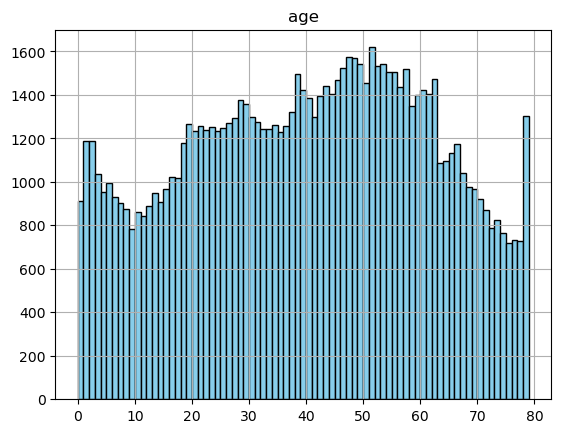

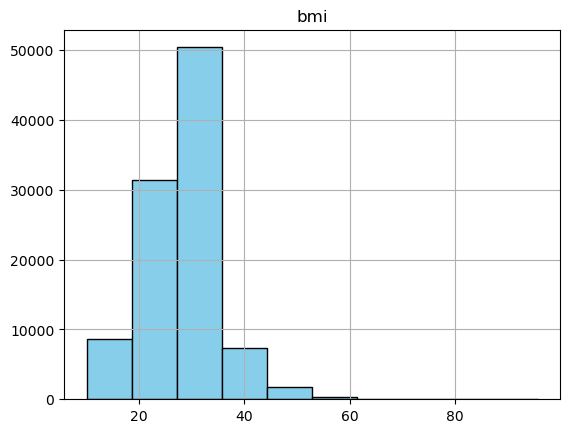

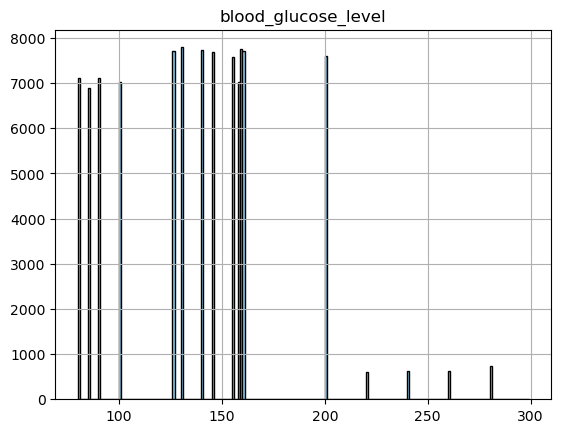

In [15]:
df.hist(column=['age'], bins=range(0,80), color='skyblue', edgecolor='black')
plt.show()

df.hist(column=['bmi'], bins=10, color='skyblue', edgecolor='black')
plt.show()

df.hist(column=['blood_glucose_level'], bins=range(80,300), color='skyblue', edgecolor='black')
plt.show()

In [18]:
x = df.drop('diabetes',axis=1)
y = df['diabetes']
x

,age,hypertension,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,25.19,6.6,140
1,54.0,0,27.32,6.6,80
2,28.0,0,27.32,5.7,158
3,36.0,0,23.45,5.0,155
4,76.0,1,20.14,4.8,155
...,...,...,...,...,...
99995,80.0,0,27.32,6.2,90
99996,2.0,0,17.37,6.5,100
99997,66.0,0,27.83,5.7,155
99998,24.0,0,35.42,4.0,100


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [22]:
x_test

,age,hypertension,bmi,HbA1c_level,blood_glucose_level
56324,37.0,0,36.31,5.7,100
52881,12.0,0,27.32,6.2,145
60647,23.0,0,37.25,6.0,90
42046,23.0,0,27.32,6.0,80
9912,32.0,0,22.73,6.0,159
...,...,...,...,...,...
95072,21.0,0,25.16,4.8,160
84693,26.0,0,23.08,5.7,100
11015,42.0,0,25.12,6.6,155
59628,35.0,0,27.32,5.8,80


In [24]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [26]:
predictions = logmodel.predict(x_test)

In [28]:
print(predictions)

[0 0 0 ... 0 0 0]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27475
           1       0.88      0.62      0.73      2525

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy*100,"%")


Accuracy: 96.06 %


In [43]:
list1 = ['age', 'hypertension', 'bmi', 'HbA1c_level', 'blood_glucose_level']
values = []
for feature in list1:
    value = input(f"Enter value for {feature}: ") 
    values.append(value)
print(values)

Enter value for age:  35
Enter value for hypertension:  1
Enter value for bmi:  20
Enter value for HbA1c_level:  6.7
Enter value for blood_glucose_level:  230


['35', '1', '20', '6.7', '230']


In [45]:
value = pd.DataFrame({'age': [values[0]], 'hypertension': [values[1]], 'bmi': [values[2]], 'HbA1c_level': [values[3]],'blood_glucose_level': [values[4]]})
value

,age,hypertension,bmi,HbA1c_level,blood_glucose_level
0,35,1,20,6.7,230


In [49]:
prediction = logmodel.predict(value)
if (prediction == 0): 
    print("NO, you don't have diabetes")
else:
    print("YES, you have diabetes")    


YES, you have diabetes
